#                              CS412 - Homework 5 - Mini-Project

** Homework Option 2: Young People Survey - How likely a person is to pay more money for good, quality or healthy food? **

This project uses the Young People Survey dataset (https://www.kaggle.com/miroslavsabo/young-people-survey/). The dataset contains preferences (music taste, spending habits, etc.) and some details about the person taking the survey (such as gender, age, height, weight, etc.). 

Goal: Understand how likely will a person want to spend / pay more for healthy, good and quality food. 

To start with, I have loaded the dataset into a dataframe to clean up the data and perform pre-processing steps. Post this, I set a baseline with the Logistic Regression model. To understand how features play a role, there are feature selection methods used, and then classic machine learning models have been applied. 


In [688]:
'''Defining Imports'''
from pandas import *
import numpy
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import operator
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import statistics

# print('Young People Survey Dataset - Task 2\n\n')

'''Pulling the data from the CSV files'''
#Loading data
print('Fetching required data...\n\n')
fname = 'young-people-survey/'+'responses.csv'
f = open(fname, 'r') 

df = pandas.read_csv(fname)
# print(df.describe())
# print(len(df.columns))

Fetching required data...




In order to understand the dataset, using data visualization techniques. 


1) A basic viz using histogram gives the overview of the data

2) Understand the distribution of data according to our label / target column - 'Spending on healthy eating'

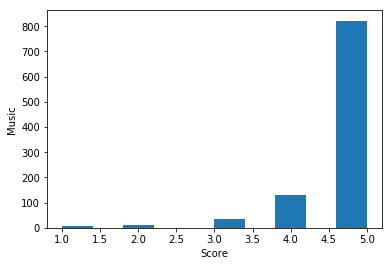

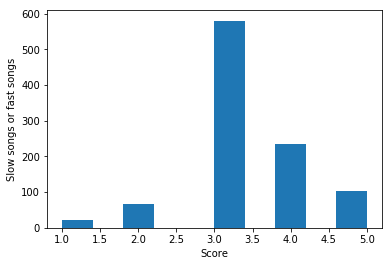

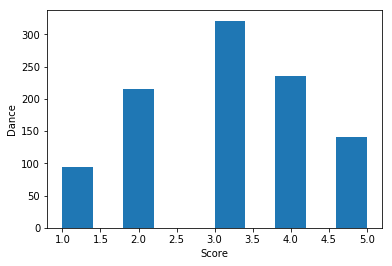

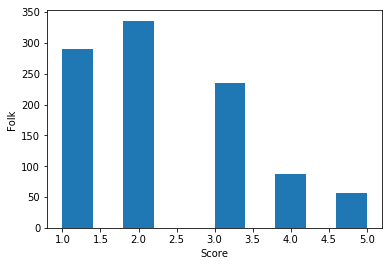

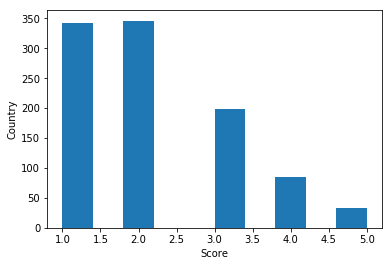

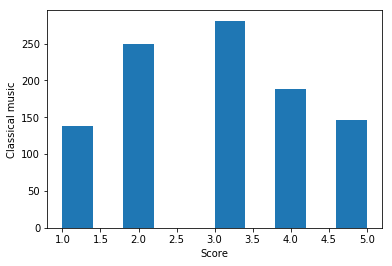

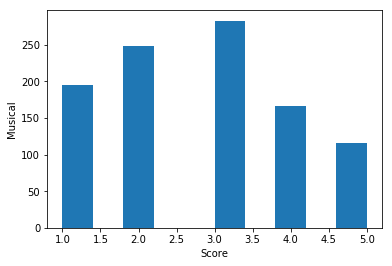

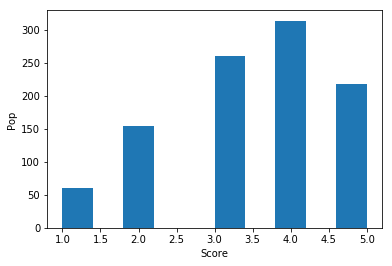

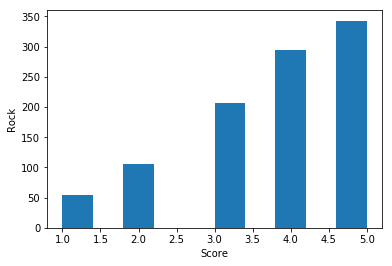

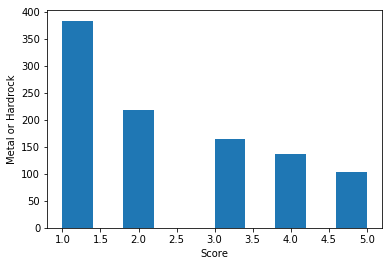

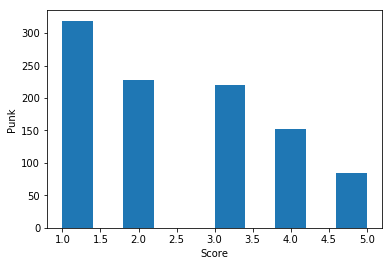

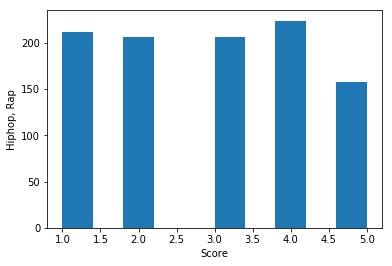

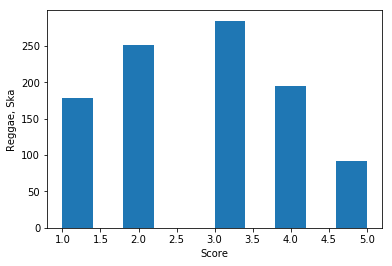

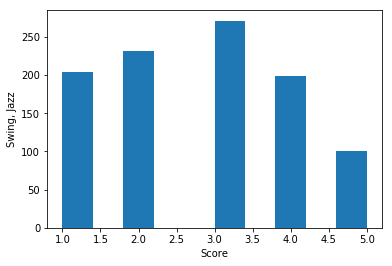

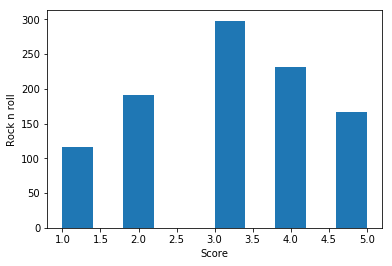

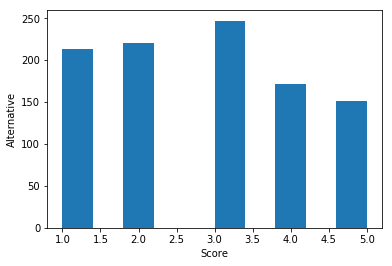

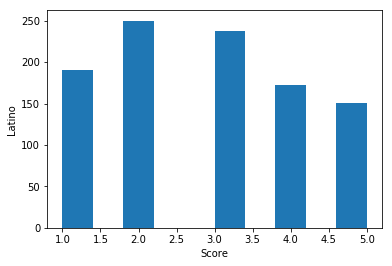

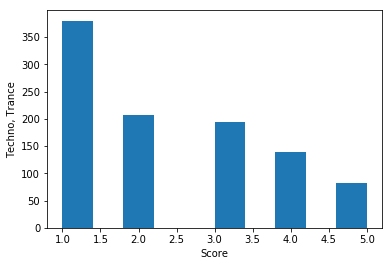

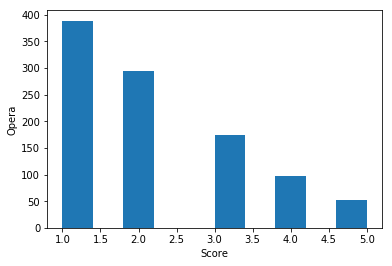

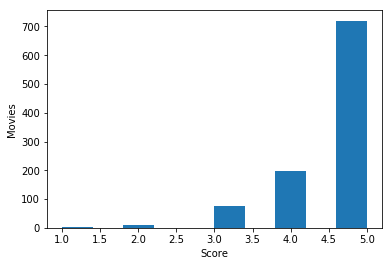

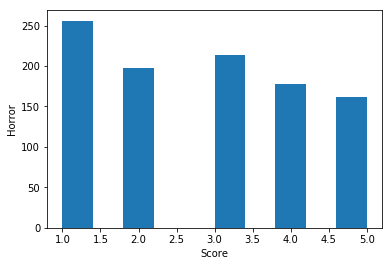

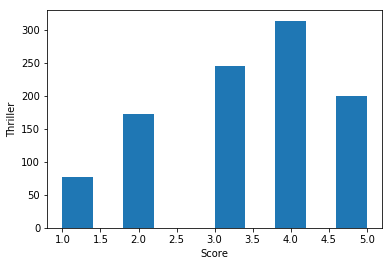

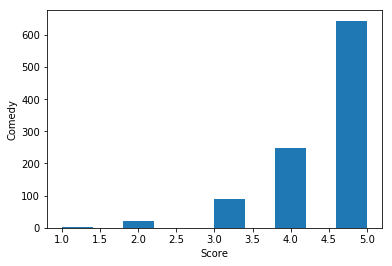

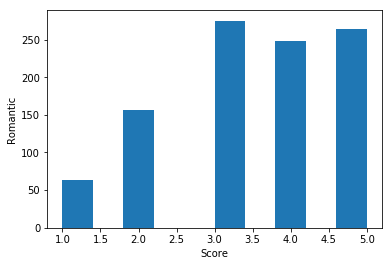

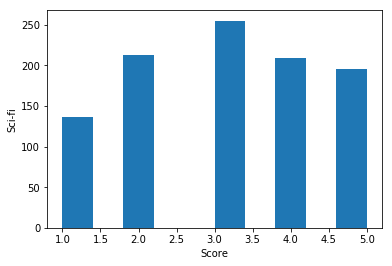

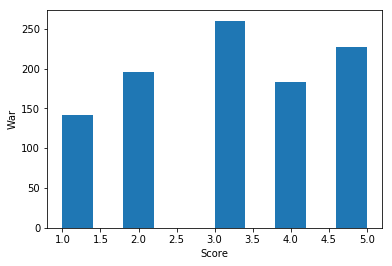

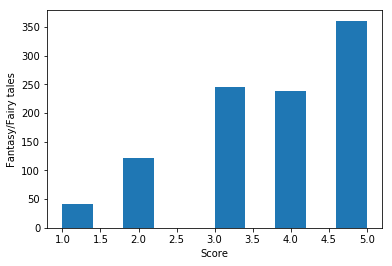

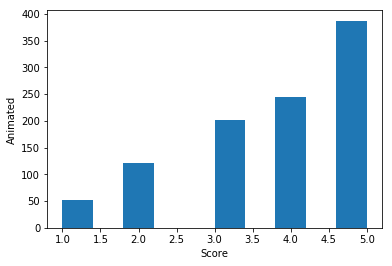

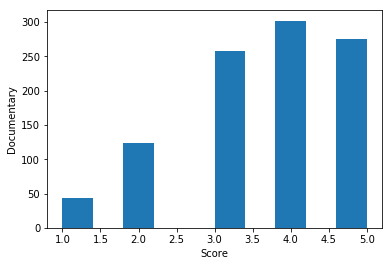

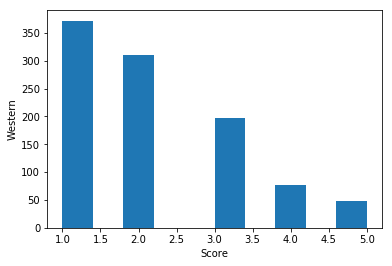

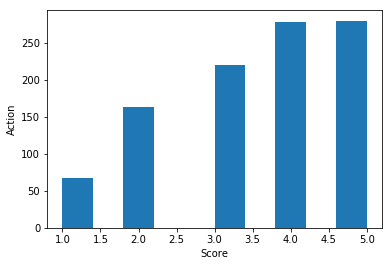

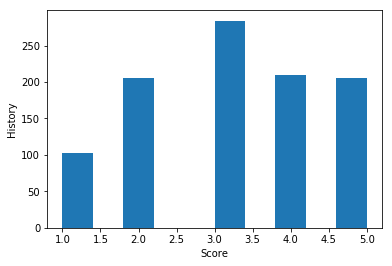

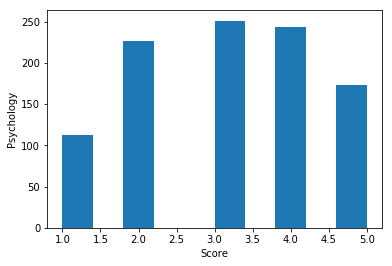

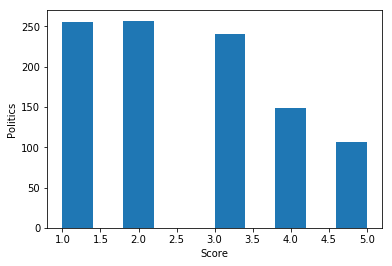

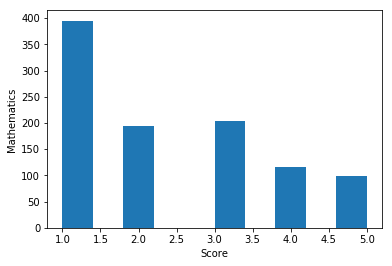

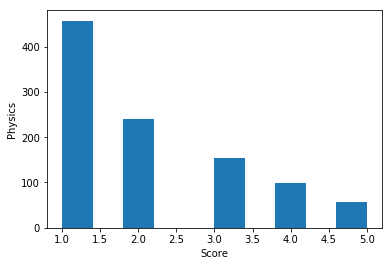

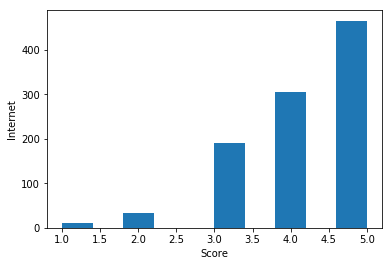

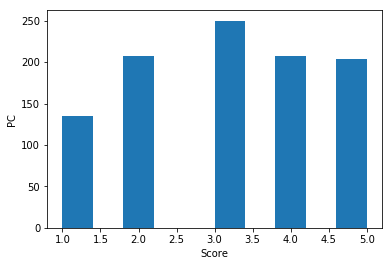

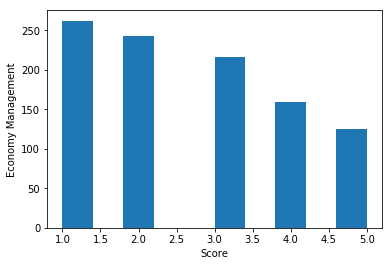

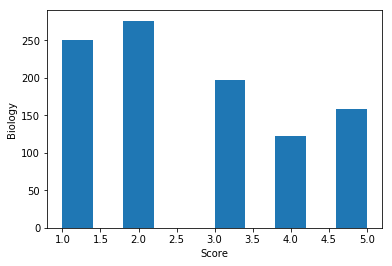

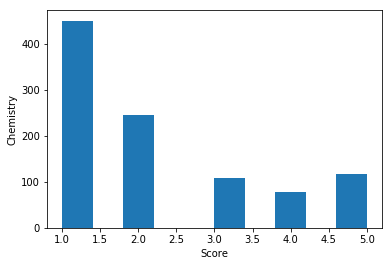

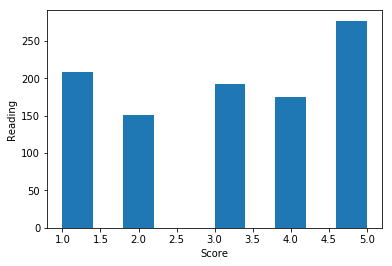

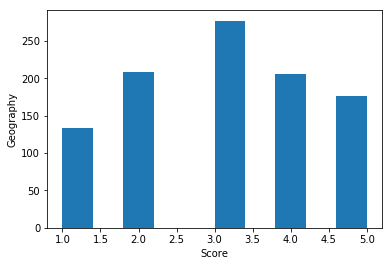

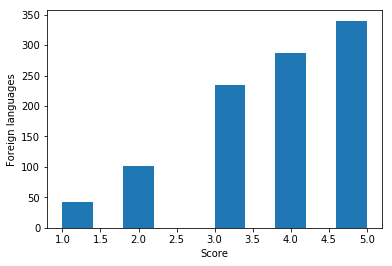

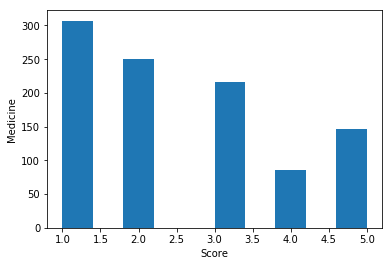

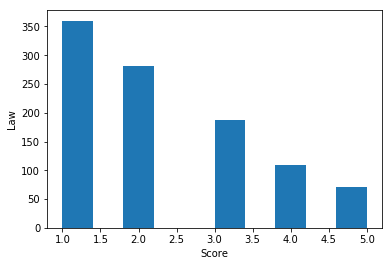

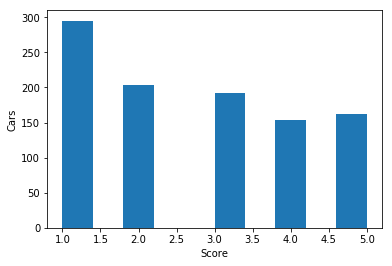

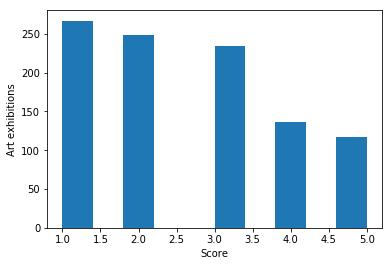

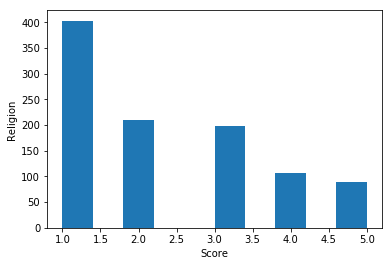

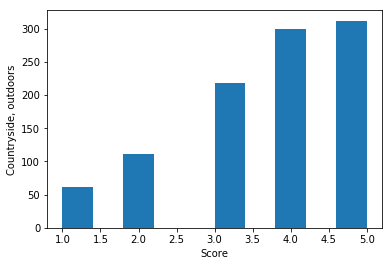

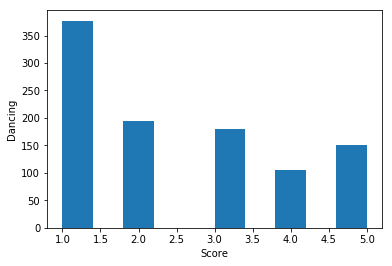

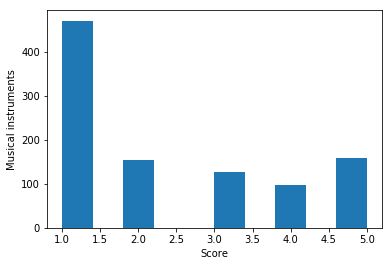

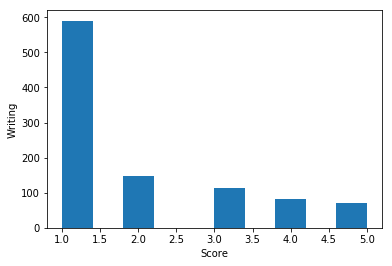

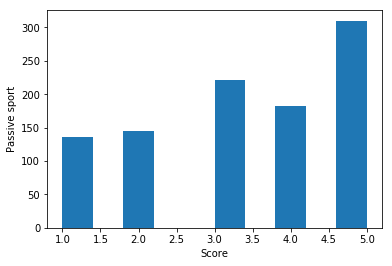

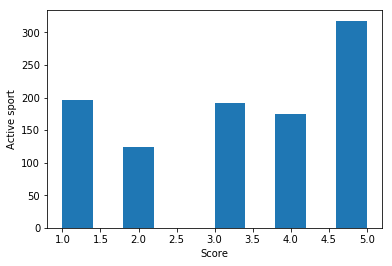

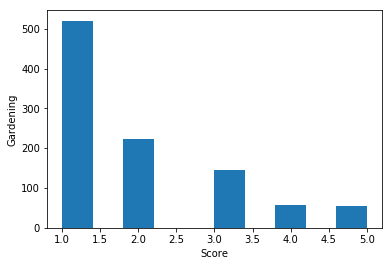

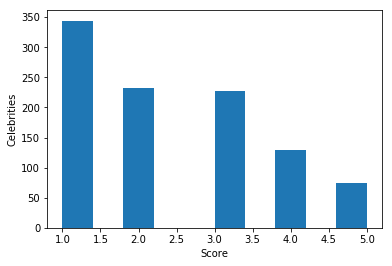

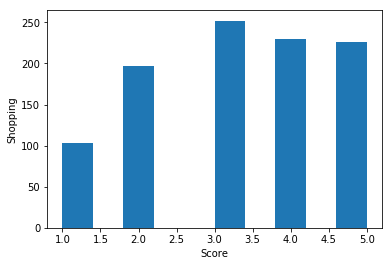

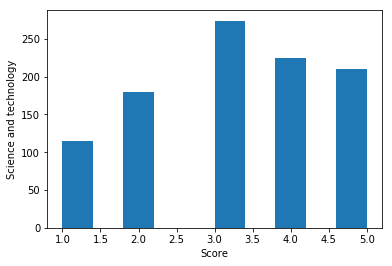

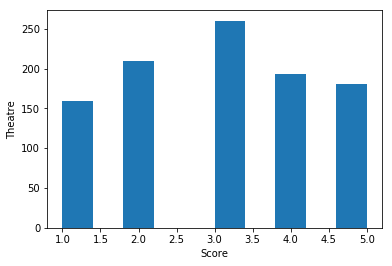

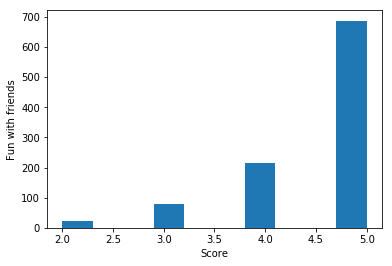

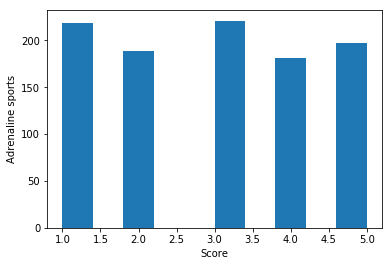

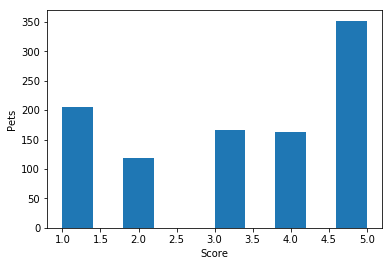

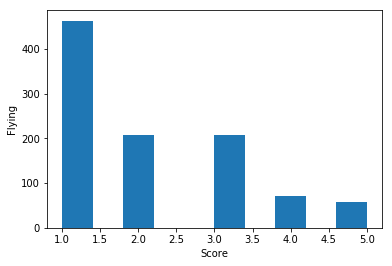

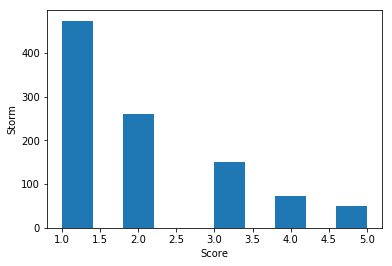

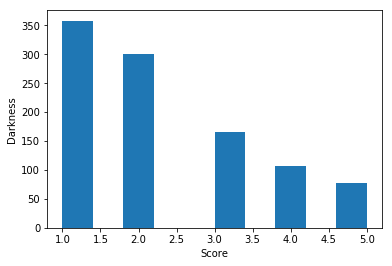

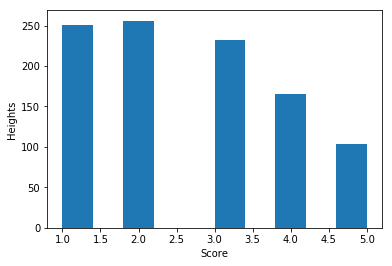

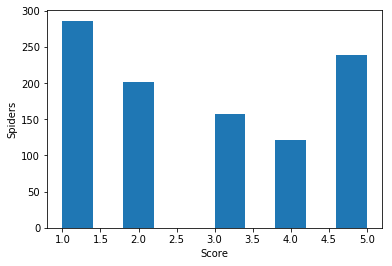

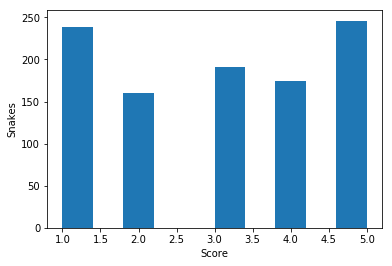

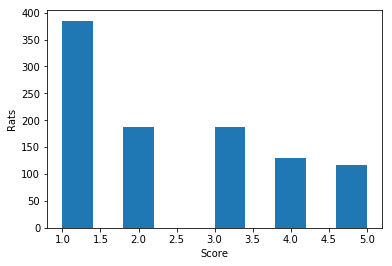

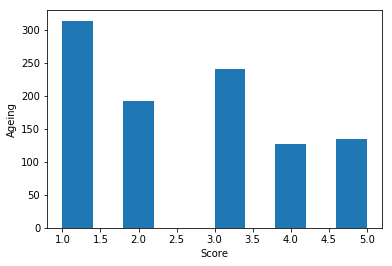

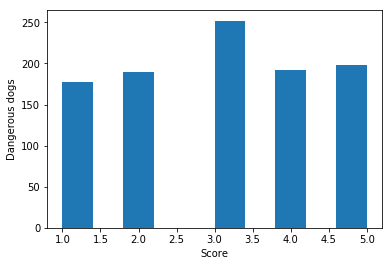

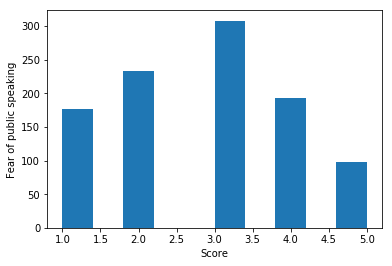

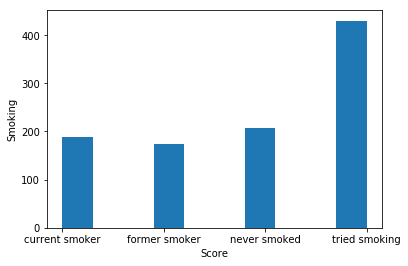

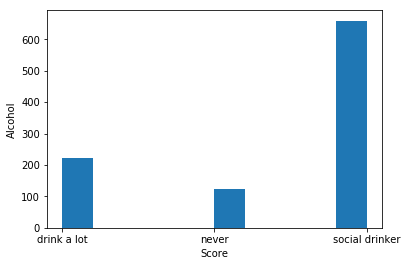

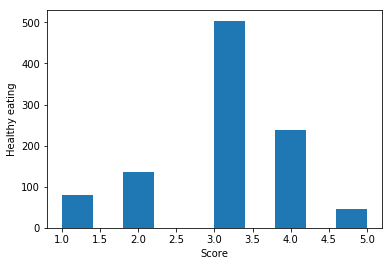

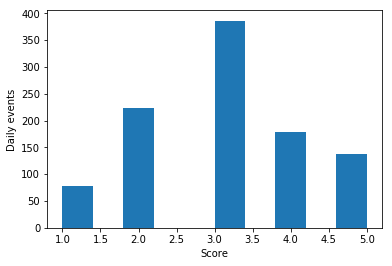

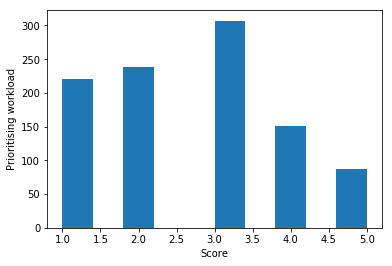

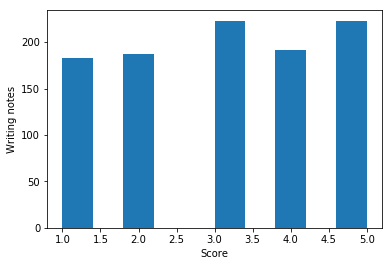

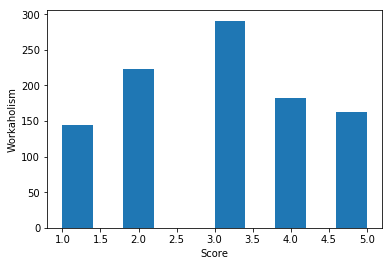

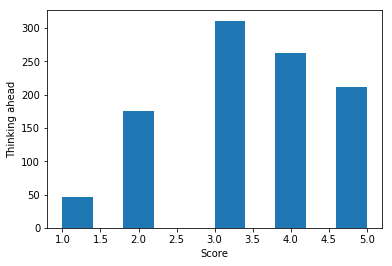

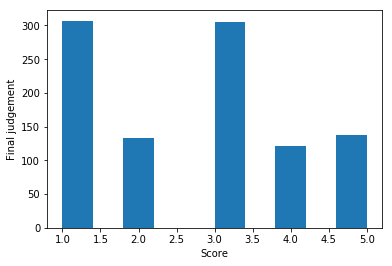

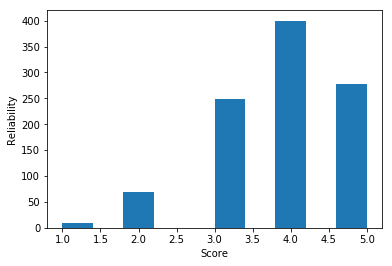

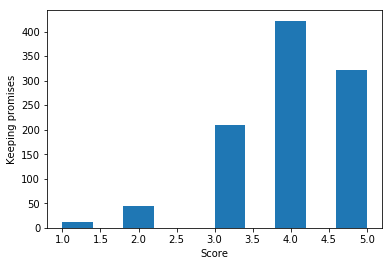

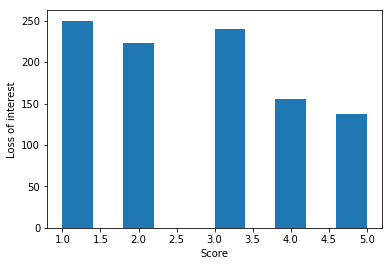

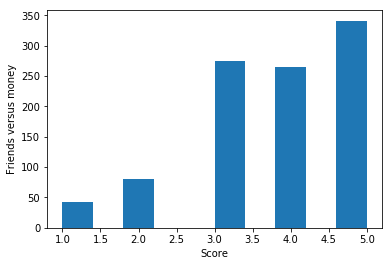

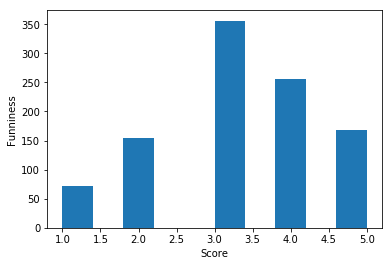

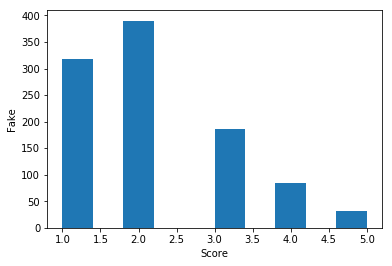

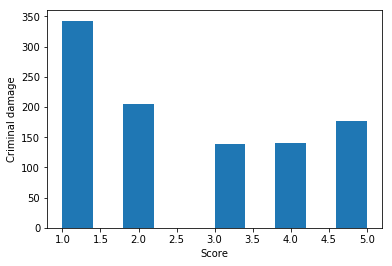

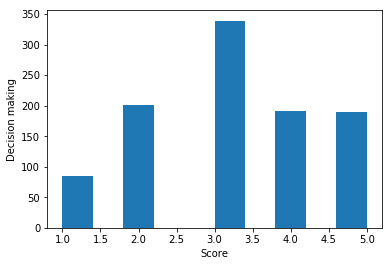

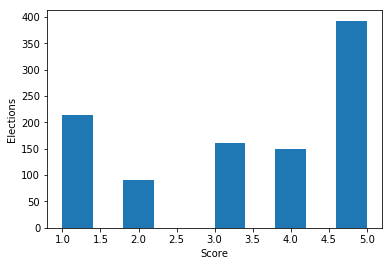

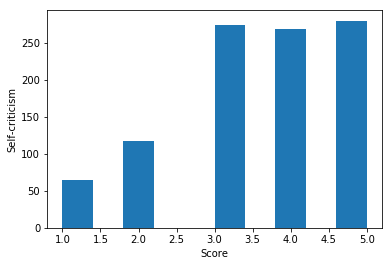

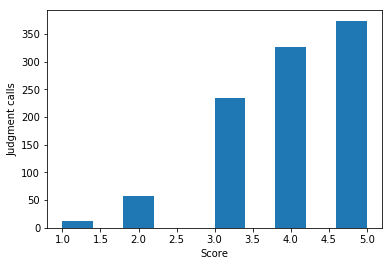

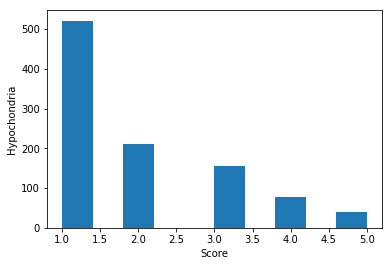

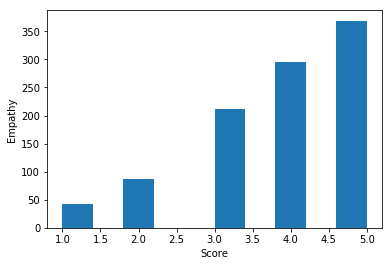

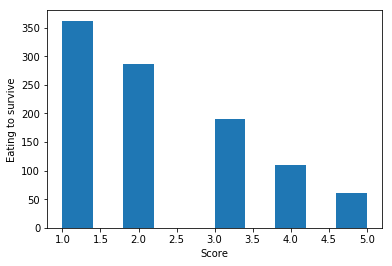

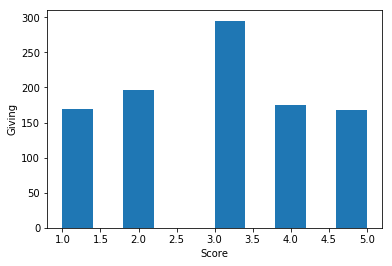

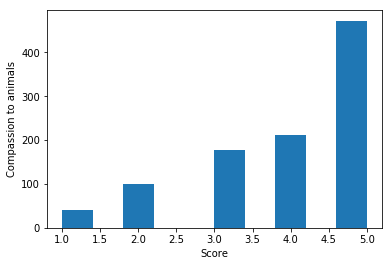

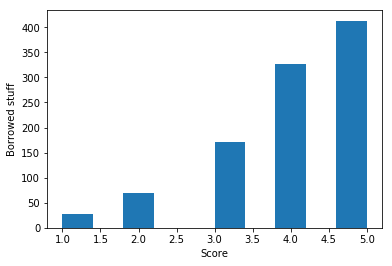

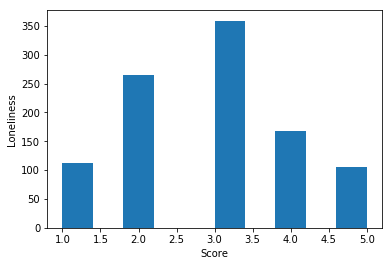

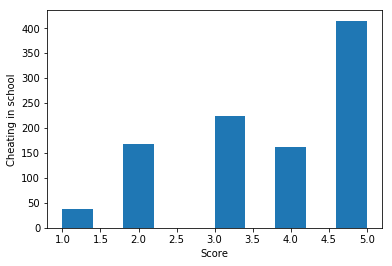

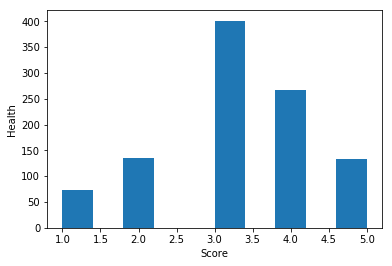

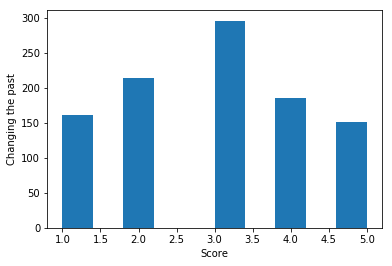

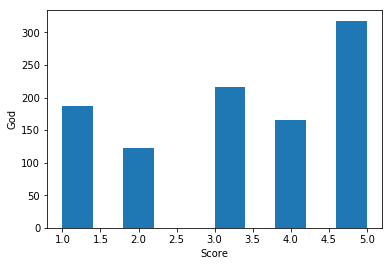

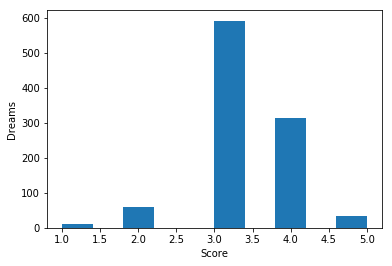

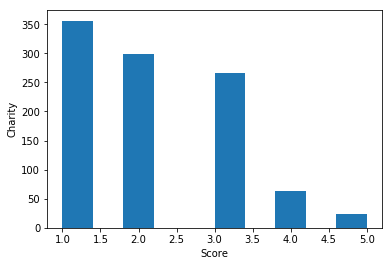

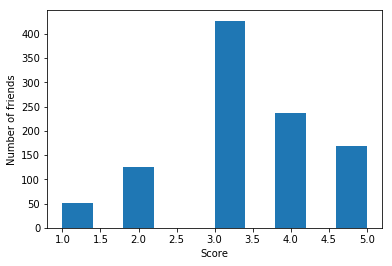

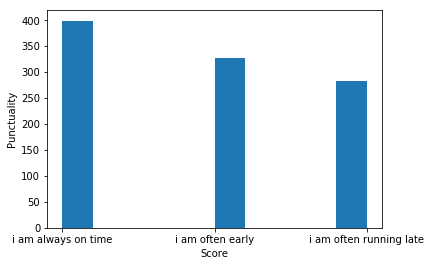

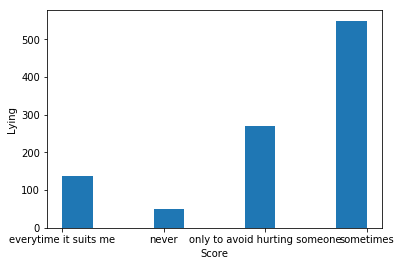

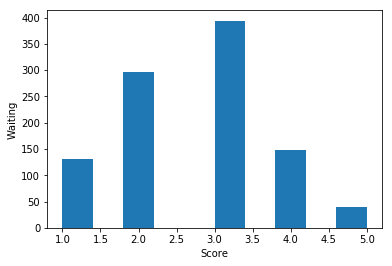

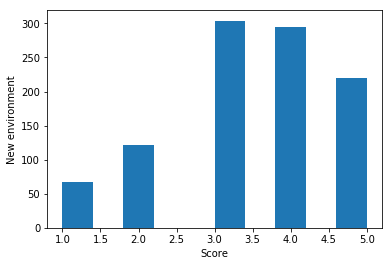

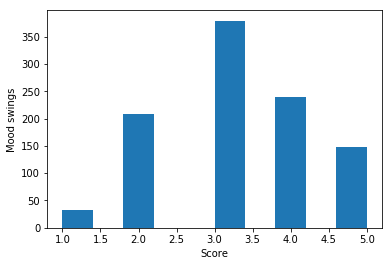

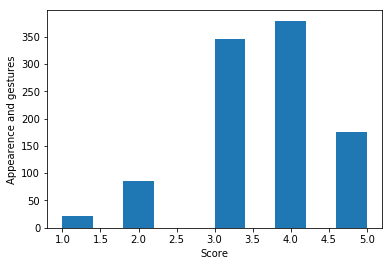

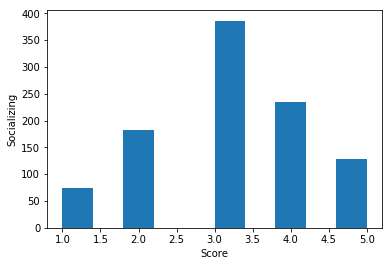

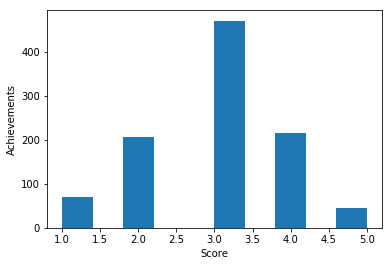

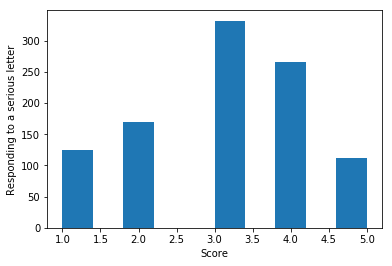

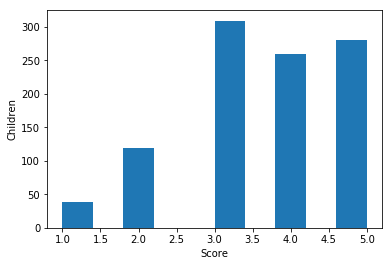

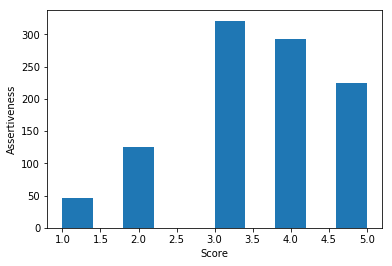

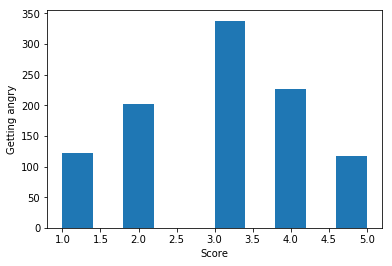

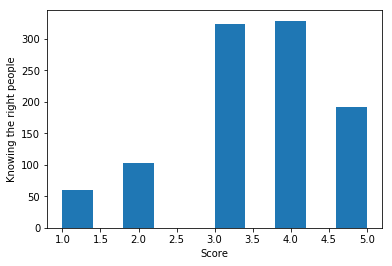

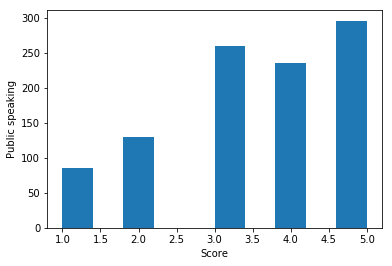

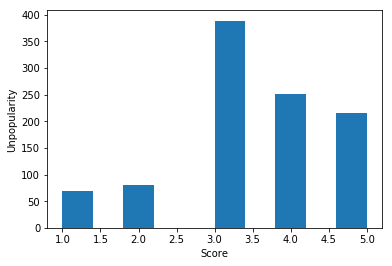

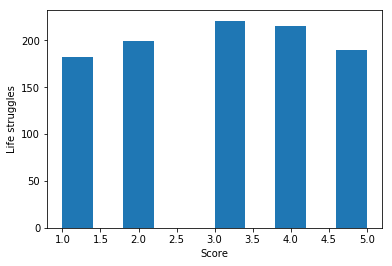

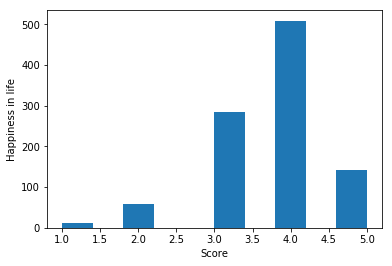

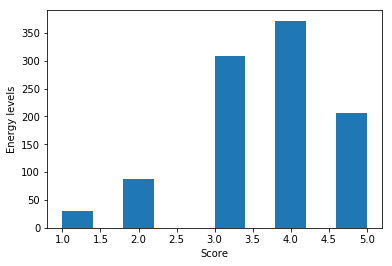

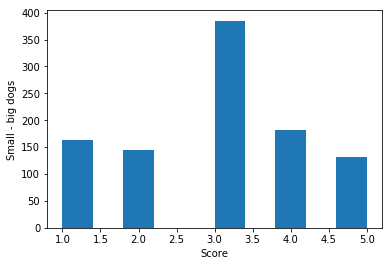

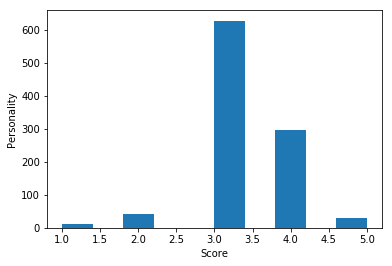

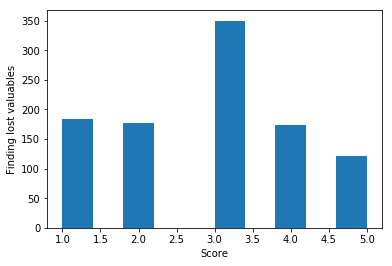

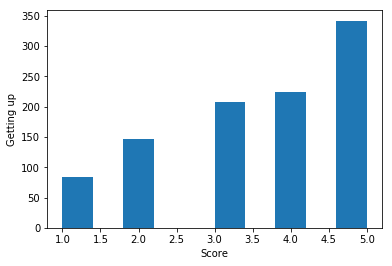

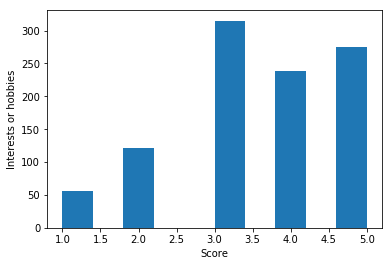

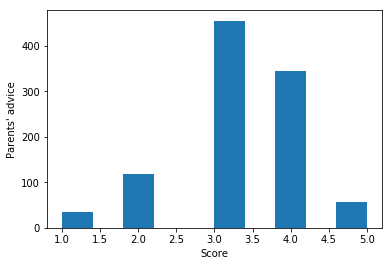

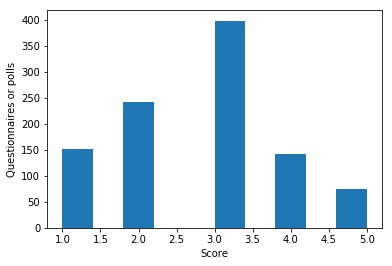

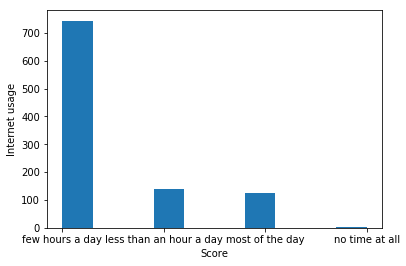

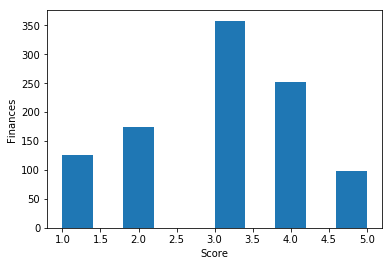

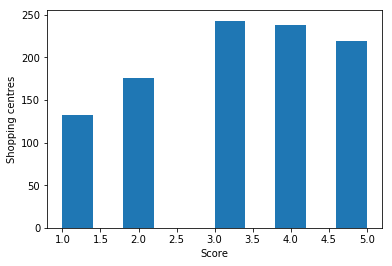

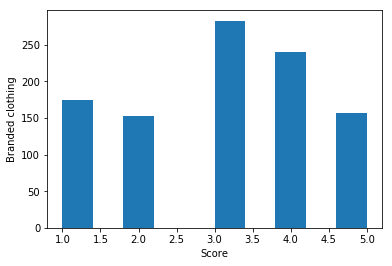

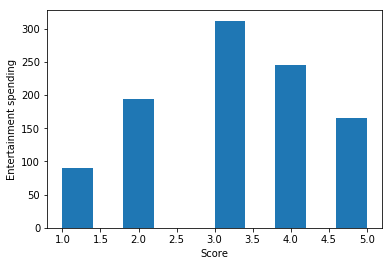

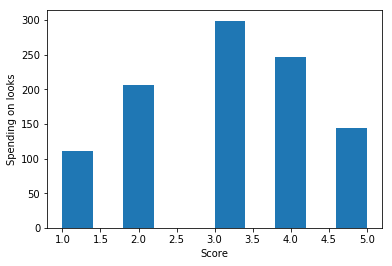

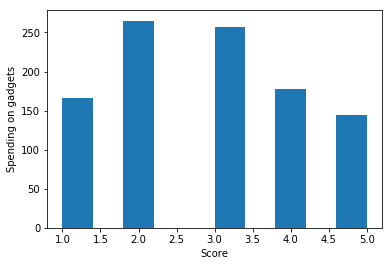

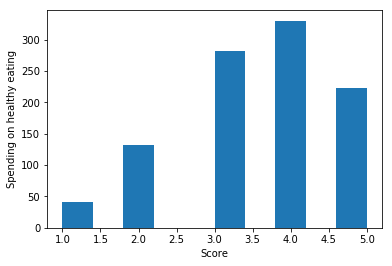

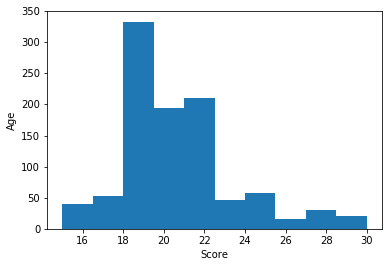

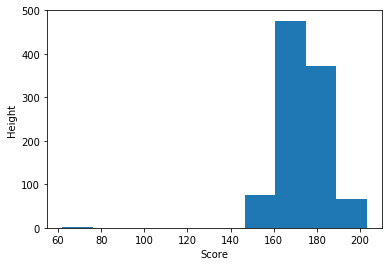

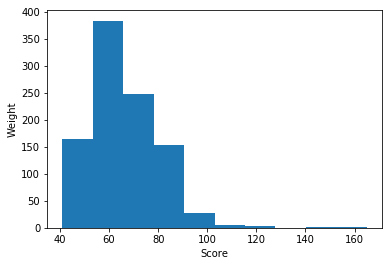

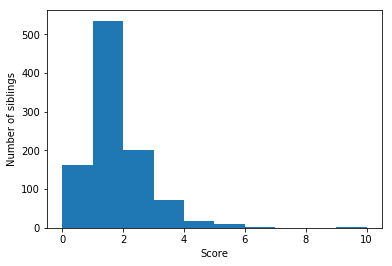

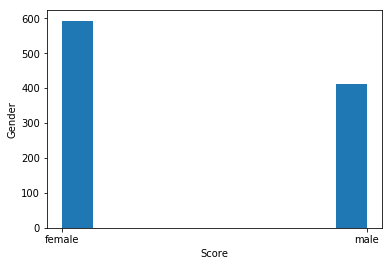

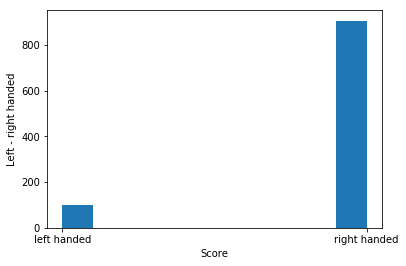

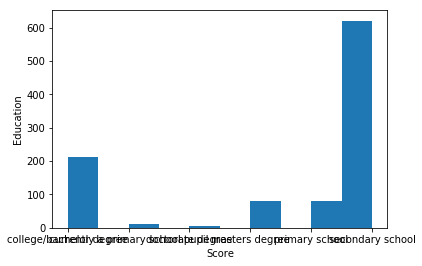

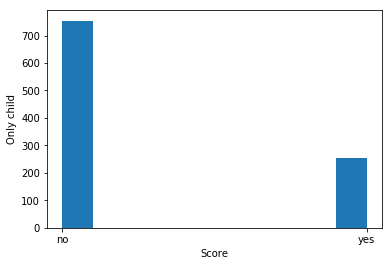

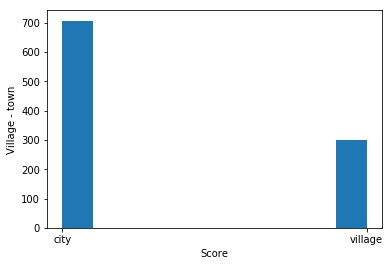

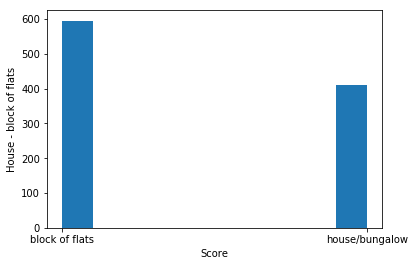

In [689]:
# 1) A basic viz using histogram gives the overview of the data
for field in df.columns:
    df[field].hist()
    plt.xlabel('Score')
    plt.ylabel(field)
    plt.grid(False)
    plt.show()
# df.hist()


Distribution of data according to our label / target column - Spending on healthy eating


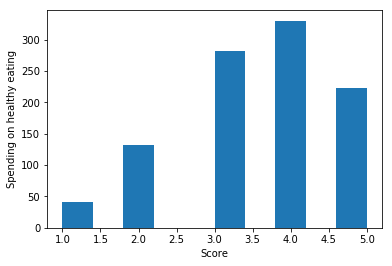

In [690]:
# 2) Understand the distribution of data according to our label / target column - 'Spending on healthy eating'
print('Distribution of data according to our label / target column - Spending on healthy eating')
df['Spending on healthy eating'].hist()
plt.xlabel('Score')
plt.ylabel('Spending on healthy eating')
plt.grid(False)
plt.show()


From the above plot, we observe that the highest number of class is score 4, while the class 1 is under-represented. This unbalanced or skewed data is not very desirable for general classification. 

Using resample method from the sklearn library to add more rows to the dataset with class as 1. 

In [4]:
from sklearn.utils import resample

# X_sparse = resample(df(df['Spending on healthy eating'] == 1), n_samples = 70, random_state=10, replace=True)
X_sparse = df[df['Spending on healthy eating'] == 1]
# X_sparse

X_resampled = resample(X_sparse, n_samples = 70, replace = True, random_state = 70)
print(X_resampled.shape)
X_resampled
df = concat([df, X_resampled], axis = 0)
df.shape

# df = new_df
# df = df + X_resampled
# df

(70, 150)


(1080, 150)

Distribution of data after resampling of class 1:


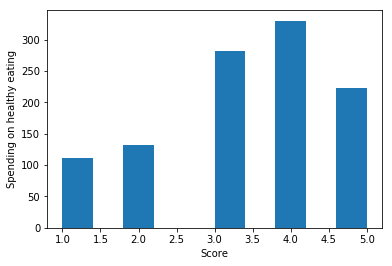

In [5]:
print('Distribution of data after resampling of class 1:')
df['Spending on healthy eating'].hist()
plt.xlabel('Score')
plt.ylabel('Spending on healthy eating')
plt.grid(False)
plt.show()

In [6]:
print(df.shape)
print('Preprocessing data...\n')
# Fill mean for numerical cols        
for each_df in df:
#     print(X[each_x].dtypes)

    if df[each_df].dtypes != 'object' and each_df != 'Spending on healthy eating':
        df[each_df].fillna(df[each_df].mean(), inplace=True)
# print('\n\n\n\n')        
# print(df.isnull().sum())

# Fill mode for the categorical data cols:
for each_df1 in df:
    if df[each_df1].dtypes == 'object':
        df[each_df1].fillna(statistics.mode(df[each_df1]), inplace = True)
# print('\n\n\n\n')        
# print(df.isnull().sum()) 
print('Dropping rows with no label values in the target column...\n')
df.dropna(inplace = True)
# df.describe()
df.reset_index(drop = True, inplace = True)
print('Dataset now contains %d rows and %d columns...\n' %(df.shape[0], df.shape[1]))




(1080, 150)
Preprocessing data...

Dropping rows with no label values in the target column...

Dataset now contains 1078 rows and 150 columns...



In [7]:
print('Preparing input features and output labels...')
X = df.drop(['Spending on healthy eating'], axis = 1)
# print(X.shape)
Y = df['Spending on healthy eating']
# print(X.shape, Y.shape)

column_types = X.columns
# print(column_types)
le = LabelEncoder()
for index, col in enumerate(column_types):
    
    if X[col].dtypes == 'object':
        le.fit(X[col])
#         print(le.classes_)
        X[col] = le.transform(X[col])
#         print(X[col])
#         print('*********')

# print(X.isnull().sum().sum())
X = X.round()
Y = Y.round()


Preparing input features and output labels...


In [8]:
print(df.shape)

(1078, 150)


In [9]:
# Fill mean for numerical cols        
for each_df in df:
#     print(X[each_x].dtypes)

    if df[each_df].dtypes != 'object' and each_df != 'Spending on healthy eating':
        df[each_df].fillna(df[each_df].mean(), inplace=True)
# print('\n\n\n\n')        
print(df.isnull().sum())

Music                         0
Slow songs or fast songs      0
Dance                         0
Folk                          0
Country                       0
Classical music               0
Musical                       0
Pop                           0
Rock                          0
Metal or Hardrock             0
Punk                          0
Hiphop, Rap                   0
Reggae, Ska                   0
Swing, Jazz                   0
Rock n roll                   0
Alternative                   0
Latino                        0
Techno, Trance                0
Opera                         0
Movies                        0
Horror                        0
Thriller                      0
Comedy                        0
Romantic                      0
Sci-fi                        0
War                           0
Fantasy/Fairy tales           0
Animated                      0
Documentary                   0
Western                       0
                             ..
Public s

In [10]:
import statistics
# Fill mode for the categorical data cols:
for each_df1 in df:
    if df[each_df1].dtypes == 'object':
        df[each_df1].fillna(statistics.mode(df[each_df1]), inplace = True)
# print('\n\n\n\n')        
print(df.isnull().sum())        

Music                         0
Slow songs or fast songs      0
Dance                         0
Folk                          0
Country                       0
Classical music               0
Musical                       0
Pop                           0
Rock                          0
Metal or Hardrock             0
Punk                          0
Hiphop, Rap                   0
Reggae, Ska                   0
Swing, Jazz                   0
Rock n roll                   0
Alternative                   0
Latino                        0
Techno, Trance                0
Opera                         0
Movies                        0
Horror                        0
Thriller                      0
Comedy                        0
Romantic                      0
Sci-fi                        0
War                           0
Fantasy/Fairy tales           0
Animated                      0
Documentary                   0
Western                       0
                             ..
Public s

In [11]:
df.dropna(inplace = True)
# df.describe()
df.reset_index(drop = True, inplace = True)


In [12]:
df.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,...,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000
mean,4.724140,3.335501,3.110293,2.260513,2.111022,2.928118,2.725841,3.469661,3.746282,2.372104,...,3.188659,3.031600,3.181400,3.055814,2.824675,3.391466,20.383761,173.493317,66.365767,1.310631
std,0.682957,0.850956,1.170270,1.129629,1.071185,1.254690,1.256412,1.159020,1.195389,1.372621,...,1.345822,1.321533,1.212603,1.221386,1.302046,1.231286,2.805565,9.801344,13.510438,1.007658
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,62.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,19.000000,167.000000,56.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,20.000000,173.000000,65.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,21.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,30.000000,203.000000,165.000000,10.000000


In [13]:
print(df.shape)

(1078, 150)


In [14]:
X = df.drop(['Spending on healthy eating'], axis = 1)
print(X.shape)
Y = df['Spending on healthy eating']
print(X.shape, Y.shape)


(1078, 149)
(1078, 149) (1078,)


In [15]:
Y = df['Spending on healthy eating']

In [16]:
X.shape, Y.shape

((1078, 149), (1078,))

In [17]:
column_types = X.columns
column_types


Index(['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       ...
       'Age', 'Height', 'Weight', 'Number of siblings', 'Gender',
       'Left - right handed', 'Education', 'Only child', 'Village - town',
       'House - block of flats'],
      dtype='object', length=149)

In [18]:
le = LabelEncoder()
for index, col in enumerate(column_types):
    
    if X[col].dtypes == 'object':
        le.fit(X[col])
        print(le.classes_)
        X[col] = le.transform(X[col])
#         print(X[col])
#         print('*********')
print('Checking for any empty values in the feature set...')
print(X.isnull().sum().sum())

['current smoker' 'former smoker' 'never smoked' 'tried smoking']
['drink a lot' 'never' 'social drinker']
['i am always on time' 'i am often early' 'i am often running late']
['everytime it suits me' 'never' 'only to avoid hurting someone'
 'sometimes']
['few hours a day' 'less than an hour a day' 'most of the day'
 'no time at all']
['female' 'male']
['left handed' 'right handed']
['college/bachelor degree' 'currently a primary school pupil'
 'doctorate degree' 'masters degree' 'primary school' 'secondary school']
['no' 'yes']
['city' 'village']
['block of flats' 'house/bungalow']
Checking for any empty values in the feature set...
0


In [19]:
Y.dtypes
print(Y)


0       3.0
1       2.0
2       2.0
3       1.0
4       4.0
5       4.0
6       5.0
7       2.0
8       4.0
9       4.0
10      2.0
11      2.0
12      3.0
13      3.0
14      4.0
15      5.0
16      3.0
17      5.0
18      4.0
19      3.0
20      4.0
21      2.0
22      4.0
23      4.0
24      5.0
25      2.0
26      3.0
27      3.0
28      5.0
29      4.0
       ... 
1048    1.0
1049    1.0
1050    1.0
1051    1.0
1052    1.0
1053    1.0
1054    1.0
1055    1.0
1056    1.0
1057    1.0
1058    1.0
1059    1.0
1060    1.0
1061    1.0
1062    1.0
1063    1.0
1064    1.0
1065    1.0
1066    1.0
1067    1.0
1068    1.0
1069    1.0
1070    1.0
1071    1.0
1072    1.0
1073    1.0
1074    1.0
1075    1.0
1076    1.0
1077    1.0
Name: Spending on healthy eating, Length: 1078, dtype: float64


In [20]:
X = X.round()
Y = Y.round()
X

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,0,1,0,0,1,0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,0,1,0,0,0,0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,0,1,5,0,0,0
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,0,1,0,1,0,1
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,0,1,5,0,1,1
5,5.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,5.0,...,20.0,186.0,77.0,1.0,1,1,5,0,0,0
6,5.0,5.0,5.0,3.0,1.0,2.0,2.0,5.0,3.0,1.0,...,20.0,177.0,50.0,1.0,0,1,5,0,1,1
7,5.0,3.0,3.0,2.0,1.0,2.0,2.0,4.0,5.0,1.0,...,19.0,184.0,90.0,1.0,1,1,0,0,0,1
8,5.0,3.0,3.0,1.0,1.0,2.0,4.0,3.0,5.0,5.0,...,18.0,166.0,55.0,1.0,0,1,5,0,0,1
9,5.0,3.0,2.0,5.0,2.0,2.0,5.0,3.0,5.0,2.0,...,19.0,174.0,60.0,3.0,0,1,5,0,0,0


## Establishing Baseline Model 
The below cell uses Logistic Regression and considers all the fields of the available inputs as the feature set (excluding the 'Spending on healthy eating' field). 

In [509]:
print('*** BASELINE MODEL ***\n')
print('Using Logistic Regression, not selecting any features...\n')

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

X_train, X_test, Y_train, Y_test = train_test_split(X.round(), Y.round(), test_size = 0.2)
X_train, X_val, Y_train, Y_val = train_test_split(X_train.round(), Y_train.round(), test_size = 0.1)
log_reg.fit(X_train, Y_train)
log_reg_pred = log_reg.predict(X_val)
print('Validation Accuracy')
print(np.mean(log_reg_pred == Y_val))

log_reg_pred = log_reg.predict(X_test)
print('Test Accuracy')
print(np.mean(log_reg_pred == Y_test))


*** BASELINE MODEL ***

Using Logistic Regression, not selecting any features...

Validation Accuracy
0.3218390804597701
Test Accuracy
0.3148148148148148


An accuracy of 28.71% is achieved with all fields as features, i.e. no feature engineering. 
In the below cell, I am finding how correlated each input feature is related to the class label column. 
** Played around with the number of the features (highly correlated) and the effect it has on the accuracy. I found 18 to be an optimum value. A value less than 9 led to classes 1 and 2 being highly under-represented, while number of features more than 22 did not improve the accuracy. 

The correlated features list are then passed to Linear SVM, Random Forest Classifier and Logistic Regression Models. 


In [180]:
print('\n\n*** Feature Selection and Applying ML Models ***\n')
'''Feature Selection Techniques'''
'''Finding correlation by Numpy's corrcoef '''

corr_arr = {}
for each_x in X:
    corr_arr[each_x] = np.corrcoef(x=X[each_x], y=Y)[0,1]
# print(corr_arr)
sorted_corr_arr = sorted(corr_arr.items(), key=operator.itemgetter(1), reverse=True)
type(sorted_corr_arr)
X_corr = sorted_corr_arr[:30]
new_X = []
for row in range(0, len(X_corr)):
    new_X.append(X_corr[row][0])
new_X

X_corr = X[new_X]
X_corr



*** Feature Selection and Applying ML Models ***



,Healthy eating,Spending on looks,Spending on gadgets,Health,Happiness in life,Knowing the right people,Interests or hobbies,Giving,Energy levels,Personality,...,Workaholism,Foreign languages,Psychology,Adrenaline sports,Geography,"Hiphop, Rap",Dancing,History,Theatre,Socializing
0,4.0,3.0,1,1.0,4.0,3.0,3.0,4.0,5.0,4.0,...,4.0,5.0,5.0,4.0,3.0,1.0,3.0,1.0,2.0,3.0
1,3.0,2.0,5,4.0,4.0,4.0,3.0,2.0,3.0,3.0,...,5.0,5.0,3.0,2.0,4.0,1.0,1.0,1.0,2.0,4.0
2,3.0,3.0,4,2.0,4.0,3.0,5.0,5.0,4.0,3.0,...,3.0,5.0,2.0,5.0,2.0,1.0,5.0,1.0,5.0,5.0
3,3.0,4.0,4,1.0,2.0,4.0,3.0,1.0,2.0,2.0,...,5.0,4.0,4.0,1.0,4.0,2.0,1.0,4.0,1.0,1.0
4,4.0,3.0,2,3.0,3.0,3.0,3.0,3.0,5.0,3.0,...,3.0,3.0,2.0,2.0,2.0,5.0,1.0,3.0,2.0,3.0
5,2.0,1.0,4,3.0,3.0,4.0,5.0,3.0,4.0,3.0,...,3.0,4.0,3.0,3.0,3.0,4.0,1.0,5.0,1.0,4.0
6,4.0,4.0,1,3.0,5.0,4.0,4.0,5.0,4.0,3.0,...,5.0,4.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,5.0
7,2.0,4.0,3,3.0,4.0,4.0,4.0,3.0,4.0,4.0,...,2.0,4.0,2.0,2.0,3.0,3.0,1.0,5.0,2.0,2.0
8,1.0,1.0,3,4.0,3.0,3.0,1.0,1.0,1.0,3.0,...,4.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,5.0,4.0
9,3.0,3.0,2,4.0,4.0,4.0,3.0,4.0,4.0,3.0,...,3.0,5.0,2.0,2.0,4.0,2.0,5.0,3.0,5.0,4.0


## Proposed Model 


The value of accuracy varied on each run. Linear SVM seems to outperfrom the other models I tried. 

In [510]:
print('*** PROPOSED MODEL ***')
print('\nFinding & selecting highly correlated features and applying SVC (30 features)...\n')


*** PROPOSED MODEL ***

Finding & selecting highly correlated features and applying SVC (30 features)...



In [673]:
'''Splitting data --- Top 30 correlated features -- SVC'''
from sklearn.metrics import classification_report
from sklearn.svm import SVC

X_train, X_test, Y_train, Y_test = train_test_split(X_corr.round(), Y.round(), test_size = 0.2)
X_train, X_val, Y_train, Y_val = train_test_split(X_train.round(), Y_train.round(), test_size = 0.1)

svc_clf = SVC(C=2, kernel = 'rbf')
svc_clf.fit(X_train, Y_train)
l_svc_pred_val = svc_clf.predict(X_val)
print('The accuracy of the model on: ')
print('Validation Data:'),
print(np.mean(l_svc_pred_val == Y_val))

print('***')

# svc_clf = SVC(multi_class = 'ovr', C=2)
svc_clf.fit(X_train, Y_train)
l_svc_pred = svc_clf.predict(X_test)
print('Test Data:')
print(np.mean(l_svc_pred == Y_test))
# print(l_svc_pred)
print('\n')

print('***')

print('Confusion Matrix for this model:')

target_names = ['Score 1', 'Score 2', 'Score 3', 'Score 4', 'Score 5']
print(classification_report(Y_test, l_svc_pred, target_names=target_names))


The accuracy of the model on: 
Validation Data:
0.42528735632183906
***
Test Data:
0.4675925925925926


***
Confusion Matrix for this model:
             precision    recall  f1-score   support

    Score 1       0.77      1.00      0.87        27
    Score 2       0.00      0.00      0.00        23
    Score 3       0.39      0.40      0.40        60
    Score 4       0.42      0.52      0.46        69
    Score 5       0.50      0.38      0.43        37

avg / total       0.43      0.47      0.44       216



In [678]:
'''Trying to understand what the model got wrong'''
print(l_svc_pred_val, Y_val)

[5. 5. 4. 3. 4. 5. 5. 5. 5. 3. 4. 5. 4. 3. 3. 3. 5. 5. 3. 3. 3. 2. 4. 5.
 4. 4. 4. 2. 3. 2. 3. 5. 1. 3. 3. 3. 4. 4. 4. 5. 5. 1. 4. 2. 4. 3. 5. 2.
 4. 2. 3. 3. 5. 3. 1. 5. 1. 2. 3. 4. 4. 5. 1. 4. 4. 3. 2. 4. 3. 3. 3. 2.
 4. 1. 4. 5. 3. 1. 3. 3. 2. 4. 4. 2. 4. 4. 4.] 861     5.0
847     5.0
49      2.0
752     2.0
28      5.0
711     5.0
245     4.0
796     5.0
726     3.0
309     3.0
837     4.0
614     5.0
781     2.0
361     5.0
458     3.0
901     4.0
571     5.0
843     5.0
623     3.0
771     2.0
825     4.0
372     4.0
167     2.0
414     4.0
59      4.0
983     4.0
8       4.0
606     1.0
260     3.0
175     3.0
       ... 
968     2.0
694     5.0
327     3.0
204     2.0
99      4.0
915     4.0
393     5.0
688     4.0
552     3.0
979     4.0
7       2.0
923     5.0
199     4.0
853     3.0
984     2.0
474     5.0
515     1.0
206     3.0
690     5.0
410     5.0
1076    1.0
948     3.0
952     4.0
394     3.0
122     3.0
959     3.0
467     3.0
106     2.0
838     5.0
593     3.0
Na

From the above Confusion Matrix, one can observe that all the classes have been encountered and predicted, with the class label as 4 (i.e. score 4 on 5) is the highest. 

In [246]:
'''Splitting data --- Top 10 correlated features -- Random Forest'''
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, Y_train, Y_test = train_test_split(X_corr.round(), Y.round(), test_size = 0.2)
X_train, X_val, Y_train, Y_val = train_test_split(X_train.round(), Y_train.round(), test_size = 0.1)

randF_clf = RandomForestClassifier(n_estimators = 6, max_depth = 6, max_features = 30, criterion = 'gini', warm_start = False)
randF_clf.fit(X_train, Y_train)
l_randF_pred = randF_clf.predict(X_val)
print('Validation Accuracy')
print(np.mean(l_randF_pred == Y_val))

Validation Accuracy
0.4482758620689655


In [292]:
# randF_clf = RandomForestClassifier(max_features = 10, criterion = 'entropy', warm_start = False)
randF_clf.fit(X_train, Y_train)
l_randF_pred = randF_clf.predict(X_test)
print('Test Accuracy')
print(np.mean(l_randF_pred == Y_test))


Test Accuracy
0.4305555555555556


In [353]:
log_reg = LogisticRegression()

X_train, X_test, Y_train, Y_test = train_test_split(X_corr.round(), Y.round(), test_size = 0.2)
X_train, X_val, Y_train, Y_val = train_test_split(X_train.round(), Y_train.round(), test_size = 0.1)
log_reg.fit(X_train, Y_train)
log_reg_pred = log_reg.predict(X_val)
print('The accuracy of the model on: ')
print('Validation Data:'),
print(np.mean(log_reg_pred == Y_val))

log_reg_pred = log_reg.predict(X_test)
print('Test Data: '),
print(np.mean(log_reg_pred == Y_test))

The accuracy of the model on: 
Validation Data:
0.27586206896551724
Test Data: 
0.38425925925925924


In [494]:
from sklearn.feature_selection import RFE
print('Using Recursive Feature Elimination for selecting features and applying Logistic Regression...\n')
log_reg = LogisticRegression(multi_class='ovr', C = 2, solver='newton-cg', max_iter=105, n_jobs=20)

rfe = RFE(log_reg, 30)
print('Fitting model on 30 features...')
fit_ = rfe.fit(X_train, Y_train)
# print(fit_.support_)
pred = rfe.predict(X_val)
print('The accuracy of the model on: ')
print('Validation Data:'),
# print(np.mean(pred == Y_val))
score = accuracy_score(Y_val.round(), pred)
print(score)

pred = rfe.predict(X_test)
print('Test Data:'),
# print(np.mean(pred == Y_val))
score = accuracy_score(Y_test.round(), pred)
print(score)
print(classification_report(Y_test, pred, target_names=target_names))

Using Recursive Feature Elimination for selecting features and applying Logistic Regression...

Fitting model on 30 features...
The accuracy of the model on: 
Validation Data:
0.3333333333333333
Test Data:
0.3611111111111111
             precision    recall  f1-score   support

    Score 1       0.27      0.30      0.29        23
    Score 2       0.20      0.04      0.07        23
    Score 3       0.29      0.31      0.30        54
    Score 4       0.37      0.44      0.40        66
    Score 5       0.50      0.48      0.49        50

avg / total       0.35      0.36      0.35       216

